<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/4_1_232p_~282p_(%EC%97%B0%EC%8A%B5_283p_~287p_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
def im2col(img, flt_h, flt_w):  #입력이미지,필터 높이, 폭
    img_h, img_w = img.shape   #입력이미지의 높이, 폭
    out_h = img_h - flt_h + 1     #출력 이미지의 높이 (패딩 없음,->스트라이드1)
    out_w = img_w - flt_w + 1  #출력 이미지의 폭(패딩없음,->스트라이드 1)
    cols = np.zeros((flt_h*flt_w,out_h*out_w))   #생성되는 행렬의 크기
    for h in range(out_h):
       h_lim = h+flt_h   #h:필터가 걸리는 영역의 위쪽 끝, -> h_lim: 필터가 걸리는 영역의 아래쪽 끝
       for w in range(out_w):
         w_lim = w + flt_w   #w:필터가 걸리는 영역의 왼쪽 끝, -> w_lim:필터가 걸리는 영역의 오른쪽 끝
         cols[:,h*out_w+w]=img[h:h_lim,w:w_lim].reshape(-1)

    return cols
    #im2col의 구현

In [5]:
img = np.array([[1,2,3,4],  #입력 이미지
               [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]])
cols = im2col(img,2,2)  #입력 이미지와 필터의 높이, 폭을 전달한다
print(cols)
#im2col 함수를 사용한다

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [6]:
def im2col(images,flt_h,flt_w,stride,pad):
  n_bt,n_ch,img_h,img_w = images.shape
  out_h=(img_h - flt_h + 2*pad) // stride + 1 #출력 이미지의 높이
  out_w=(img_w - flt_w + 2*pad) // stride + 1 #출력 이미지의 폭
  img_pad = np.pad(images,[(0,0),(0,0),(pad,pad),(pad,pad)],"constant")
  cols=np.zeros((n_bt,n_ch,flt_h,flt_w,out_h,out_w))
  for h in range(flt_h):
      h_lim=h+stride*out_h
      for w in range(flt_w):
        w_lim = w+stride*out_w
        cols[:,:,h,w,:,:]=img_pad[:,:,h:h_lim:stride,w:w_lim:stride]
  cols=cols.transpose(1,2,3,0,4,5).reshape(n_ch*flt_h*flt_w,n_bt*out_h*out_w)
  return cols
  #배치 크기,채널 수,패딩 폭,스트라이드에 대응한 im2col함수

In [7]:
img = np.array([[[[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]]]) #입력 이미지
cols=im2col(img,2,2,1,0)  #입력 이미지, 필터의 높이,폭,스트라이드,패딩 폭
print(cols)
#배치 크기, 채널 수,패딩 폭,스트라이드에 대응한 im2col의 함수를 사용한다

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


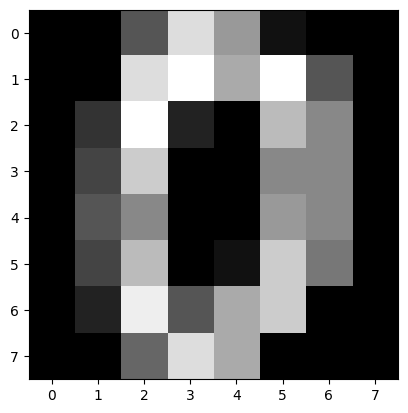

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits=datasets.load_digits()
image=digits.data[0].reshape(8,8)
plt.imshow(image,cmap='gray')  #최초의 손으로 쓴 문자 이미지를 표시
plt.show()
#손으로 쓴 문자 이미지의 표시

In [9]:
def im2col(img,flt_h,flt_w,out_h,out_w):  #입력 이미지,필터의 높이,폭,출력 이미지의 높이,폭
    cols=np.zeros((flt_h*flt_w,out_h*out_w))  #생성되는 행렬의 크기
    for h in range(out_h):
      h_lim=h+flt_h  #h:필터가 걸리는 영역의 위쪽 끝,h_lim:필터가 걸리는 영역의 아래쪽 끝
      for w in range(out_w):
        w_lim=w+flt_w  #w:필터가 걸리는 영역의 왼쪽 끝,w_lim:필터가 걸리는 영역의 오른쪽 끝
        cols[:,h*out_w+w]=img[h:h_lim,w:w_lim].reshape(-1)
      return cols
      #간단한 im2col 함수

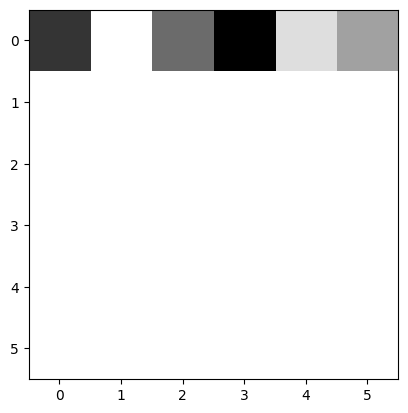

In [10]:
flt=np.array([[-1,1,-1],[-1,1,-1],[-1,1,-1]])  #세로 선을 강조하는 필터
flt_h,flt_w=flt.shape
flt=flt.reshape(-1)  #행 수가 1인 행렬
img_h,img_w=image.shape  #입력 이미지의 높이,폭
out_h=img_h-flt_h+1   #출력 이미지의 높이(패딩 없음,스트라이드1)
out_w=img_w-flt_w+1  #출력 이미지의 폭(패딩 없음,스트라이드1)
cols=im2col(image,flt_h,flt_w,out_h,out_w)
image_out=np.dot(flt,cols) #합성곱
image_out=image_out.reshape(out_h,out_w)
plt.imshow(image_out,cmap='gray')
plt.show()
#im2col과 합성곱의 구현 

(1797, 64)


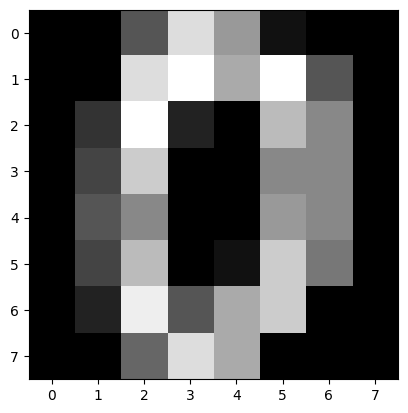

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits=datasets.load_digits()
print(digits.data.shape)
image=digits.data[0].reshape(8,8)
plt.imshow(image,cmap='gray')
plt.show()
#손으로 쓴 문자 이미지 읽어 들이기와 표시

In [12]:
def im2col(img,flt_h,flt_w,out_h,out_w,stride): #입력 이미지,풀링 영역 높이,폭,출력 이미지의 높이,폭,스트라이드
    cols=np.zeros((flt_h*flt_w,out_h*out_w)) #생성되는 행렬의 크기
    for h in range(out_h): 
        h_lim=stride*h+flt_h  #h:풀링 영역의 위쪽 끝,h_lim:풀링 영역의 아래쪽 끝
        for w in range(out_w):
            w_lim=stride*w+flt_w  #w:풀랑 영역의 왼쪽 끝,w_lim: 풀링 영역의 오른쪽
            cols[:,h*out_w+w]=img[stride*h:h_lim,stride*w:w_lim].reshape(-1)
    return cols            
#im2col 함수의 정의

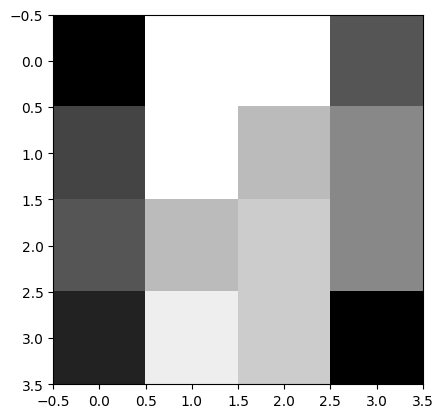

In [13]:
img_h,img_w=image.shape #입력 이미지의 높이,폭
pool=2 #풀링 영역의 크기
out_h=img_h//pool #출력 이미지의 높이
out_w=img_w//pool #출력 이미지의 폭
cols = im2col(image,pool,pool,out_h,out_w,pool) #스트라이드 크기를 풀링 영역의 크기와 같게
image_out=np.max(cols,axis=0)  #각 열의 최댓값을 취득(Max풀링)
image_out=image_out.reshape(out_h,out_w)  #출력의 형태를 갖춘다
plt.imshow(image_out,cmap="gray")
plt.show()
#im2col과 풀링

170498071/170498071 [==============================] - 3s 0us/step
Image size: (32, 32, 3)


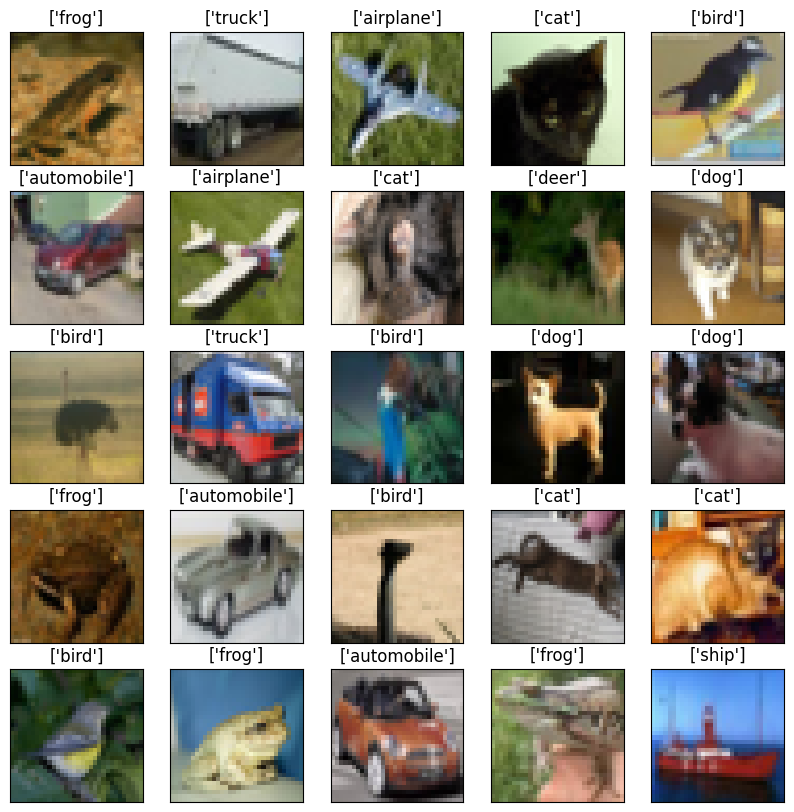

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(x_train,t_train),(x_test,t_test)=cifar10.load_data()
print("Image size:",x_train[0].shape)
cifar10_labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
n_image=25  #이미지 표시 수
rand_idx=np.random.randint(0,len(x_train),n_image)
plt.figure(figsize=(10,10)) #표시 영역의 크기
for i in range(n_image):
  cifar_img=plt.subplot(5,5,i+1)
  plt.imshow(x_train[rand_idx[i]])
  label=cifar10_labels[t_train[rand_idx[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False) #라벨과 메모리를 비표시로
plt.show()
#CIFAR-10읽어 들이기와 일부 표시

In [15]:
batch_size=32 #배치 크기
epochs=20 #에포크 수
n_class=10 #10의 클래스로 분류
#one-hot 표현으로 변환
t_train=tf.keras.utils.to_categorical(t_train,n_class) #one-hot 표현으로 변환
t_test=tf.keras.utils.to_categorical(t_test,n_class)
print(t_train[:10])
#CNN의 각 설정



[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))  #배치 크기 이외의 입력 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  #드롭 아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))
#최적화 알고리즘에 Adam, 손실함수에 교차 엔트로피를 지정해서 컴파일
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#CNN의 모델을 구축한다



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                      

In [17]:
x_train=x_train/255 #0에서 1의 범위에 넣는다
x_test=x_test/255 
history = model.fit(x_train,t_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,t_test)) #훈련데이터를 사용해 모델을 훈련한다
#CNN 모델을 훈련한다

Epoch 1/20
1563/1563 [==============================] - 22s 6ms/step - loss: 1.5365 - accuracy: 0.4423 - val_loss: 1.1422 - val_accuracy: 0.5945
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1167 - accuracy: 0.6073 - val_loss: 0.9539 - val_accuracy: 0.6635
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9494 - accuracy: 0.6672 - val_loss: 0.8502 - val_accuracy: 0.6996
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8515 - accuracy: 0.7028 - val_loss: 0.8191 - val_accuracy: 0.7265
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7745 - accuracy: 0.7314 - val_loss: 0.7814 - val_accuracy: 0.7341
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7156 - accuracy: 0.7505 - val_loss: 0.7490 - val_accuracy: 0.7407
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6634 - accuracy: 0.7662 - val_loss: 0.7228 - val_accuracy

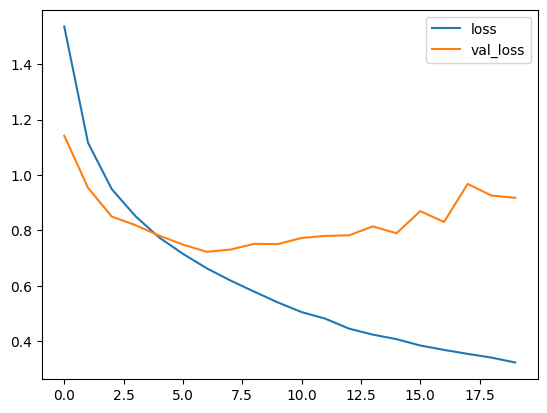

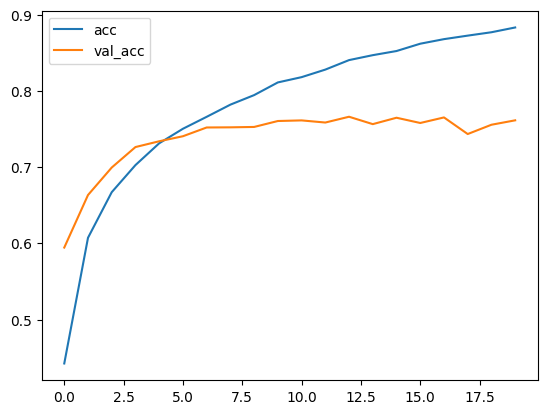

In [20]:
import matplotlib.pyplot as plt

train_loss=history.history['loss'] #훈련용 데이터의 오차
train_acc=history.history['accuracy'] #훈련용 데이터의 정밀도
val_loss=history.history['val_loss'] #검증용 데이터의 오차
val_acc=history.history['val_accuracy'] #검증용 데이터의 정밀도
#오차 표시
plt.plot(np.arange(len(train_loss)),train_loss,label='loss')
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.legend()
plt.show()
#정밀도 표시
plt.plot(np.arange(len(train_acc)),train_acc,label='acc')
plt.plot(np.arange(len(val_acc)),val_acc,label='val_acc')
plt.legend()
plt.show()
#학습의 추이를 표시

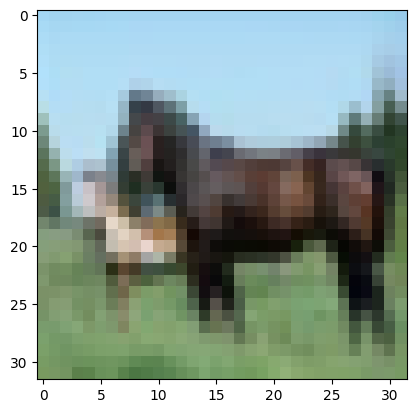

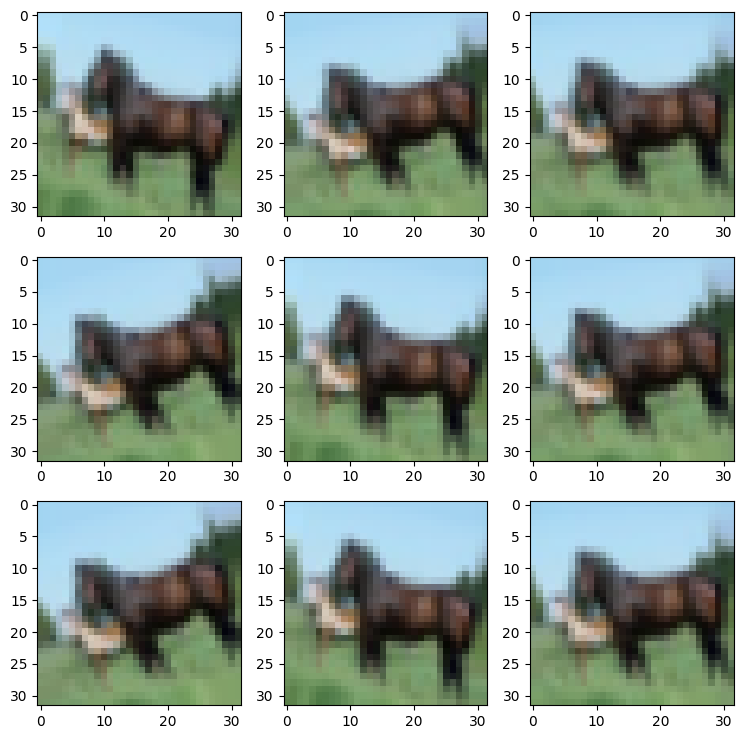

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(x_train,t_train),(x_test,t_test)=cifar10.load_data()
cifar10_labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
image=x_train[12]
plt.imshow(image)
plt.show()

def show_images(image,generator):
  channel,height,width=image.shape
  image=image.reshape(1,channel,height,width) #배치 대응
  gen=generator.flow(image,batch_size=1) #변환된 이미지의 생성

  plt.figure(figsize=(9,9))
  for i in range(9):
    gen_img=gen.next()[0].astype(np.uint8) #이미지 취득
    plt.subplot(3,3,i+1)
    plt.imshow(gen_img)
  plt.show()
#각 -20도에서 20도범위에서 랜덤으로 회전을 실시하는 이미지 생성기
generator=ImageDataGenerator(rotation_range=20)
show_images(image,generator)
#데이터 확장 -회전-

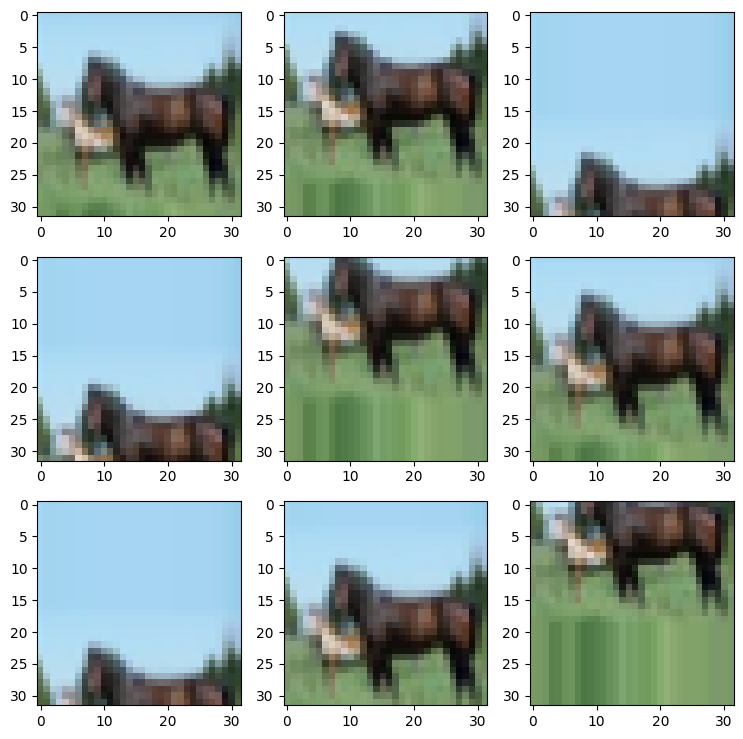

In [23]:
generator=ImageDataGenerator(width_shift_range=0.5) #이미지 크기의 반의 범위에서 랜덤으로 시프트 한다
show_images(image,generator)
#데이터 확장-수평 방향으로 시프트-

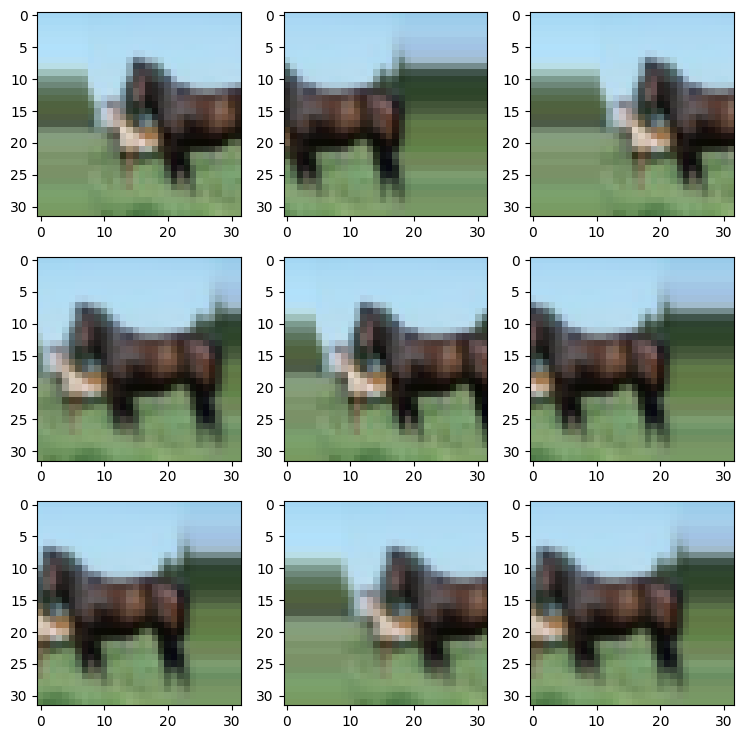

In [24]:
generator=ImageDataGenerator(height_shift_range=0.5) #이미지 크기의 반의 범위에서 랜덤으로 시프트 한다
show_images(image,generator)
#데이터 확장 -수직 방향으로 시프트-

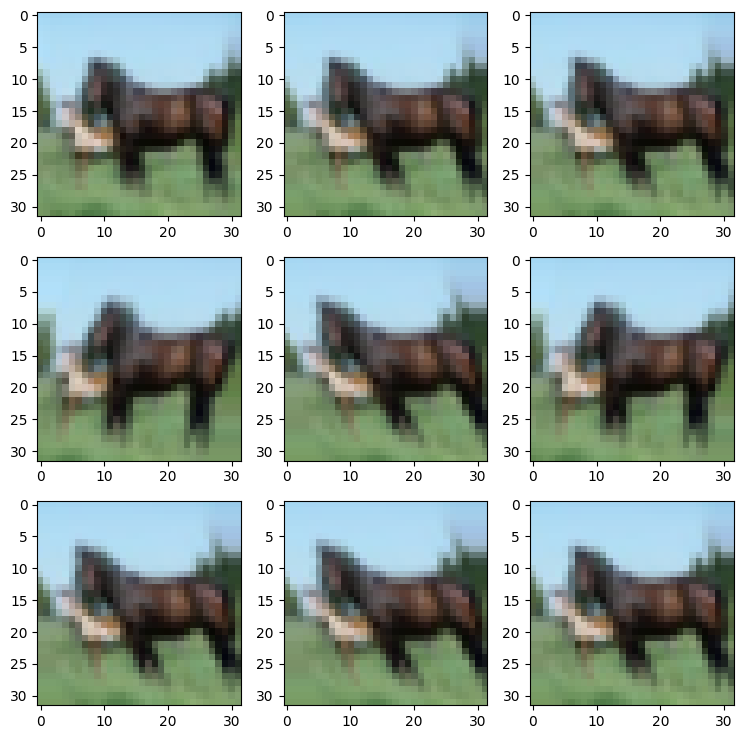

In [25]:
generator=ImageDataGenerator(shear_range=20) #시어 강도의 범위를 지정
show_images(image,generator)
#데이터 확장 -시어 강도-

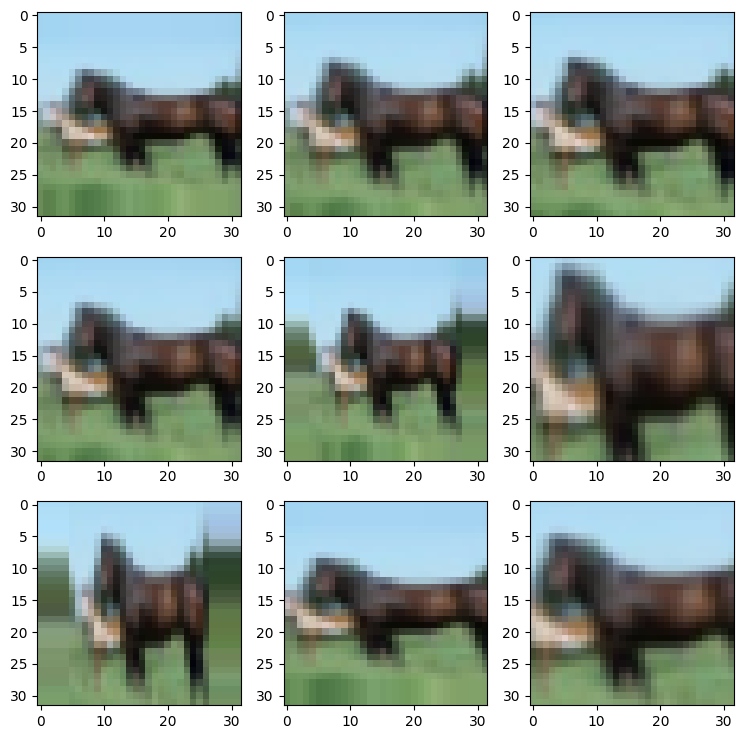

In [26]:
generator=ImageDataGenerator(zoom_range=0.4) #확대 축소하는 범위를 지정
show_images(image,generator)
#데이터 확장 -확대 축소-

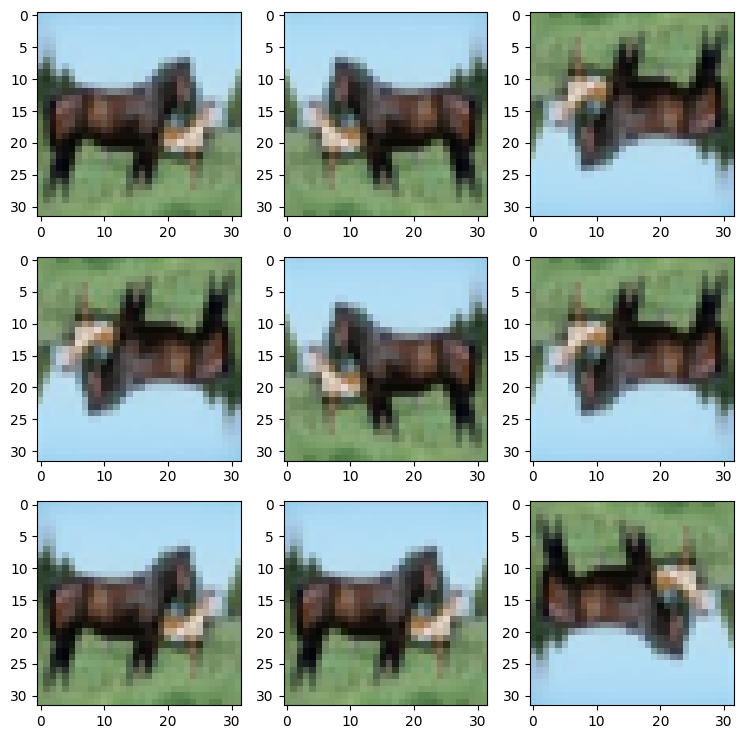

In [28]:
generator=ImageDataGenerator(horizontal_flip=True,vertical_flip=True) #수평,수직 방향으로 랜덤으로 반전
show_images(image,generator)
#데이터 확장 -랜덤으로 반전-

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

batch_size=32
epochs=20
n_class=10

t_train=tf.keras.utils.to_categorical(t_train,n_class) #one-hot 표현으로
t_test=tf.keras.utils.to_categorical(t_test,n_class)

model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:])) #제로 패딩,배치 크기 이외의 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #드롭 아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

#최적화 알고리즘에 Adam, 손실 함수에 교차 엔트로피를 지정해서 컴파일
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#CNN 모델을 구축한다


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                      

In [31]:
x_train=x_train/255 #0에서1 범위에 넣는다
x_test=x_test/255

generator =ImageDataGenerator(
    rotation_range=0.2, #랜덤으로 회전
    horizontal_flip=True) #랜덤으로, 수평 방향으로 반전
generator.fit(x_train)

history=model.fit(generator.flow(x_train,t_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,t_test))
#CNN 모델을 데이터 확장과 함께 훈련한다

Epoch 1/20
1563/1563 [==============================] - 34s 20ms/step - loss: 1.5419 - accuracy: 0.4373 - val_loss: 1.2133 - val_accuracy: 0.5685
Epoch 2/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1230 - accuracy: 0.6016 - val_loss: 0.9882 - val_accuracy: 0.6483
Epoch 3/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9554 - accuracy: 0.6643 - val_loss: 0.8351 - val_accuracy: 0.7102
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8618 - accuracy: 0.6987 - val_loss: 0.7785 - val_accuracy: 0.7282
Epoch 5/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7924 - accuracy: 0.7246 - val_loss: 0.7372 - val_accuracy: 0.7501
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7431 - accuracy: 0.7411 - val_loss: 0.7232 - val_accuracy: 0.7526
Epoch 7/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7068 - accuracy: 0.7549 - val_loss: 0.7137 -

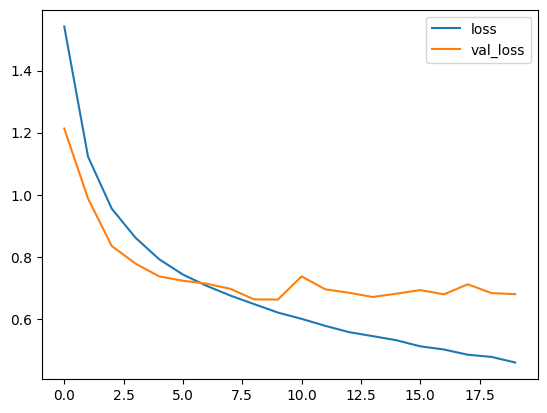

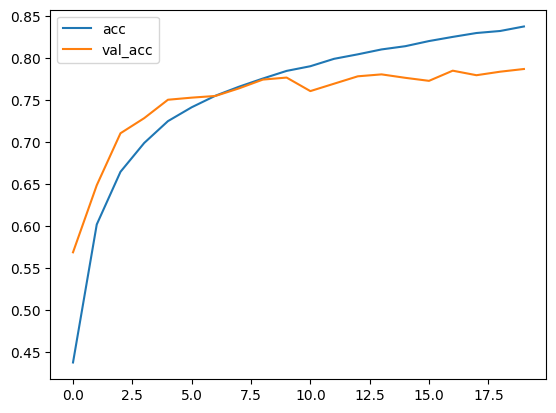

In [33]:
import matplotlib.pyplot as plt

train_loss =history.history['loss'] #훈련용 데이터의 오차
train_acc=history.history['accuracy'] #훈련용 데이터의 정밀도
val_loss=history.history['val_loss'] #검증용 데이터 오차
val_acc=history.history['val_accuracy'] #검증용 데이터의 정밀도

plt.plot(np.arange(len(train_loss)),train_loss,label='loss')
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)),train_acc,label='acc')
plt.plot(np.arange(len(val_acc)),val_acc,label='val_acc')
plt.legend()
plt.show()
#학습의 추이를 표시

In [34]:
loss,accuracy=model.evaluate(x_test,t_test)
print("오차:",loss,"정밀도:",accuracy)
#모델의 평가

313/313 [==============================] - 1s 3ms/step - loss: 0.6800 - accuracy: 0.7867
오차: 0.6800141930580139 정밀도: 0.7867000102996826


1/1 [==============================] - 0s 20ms/step


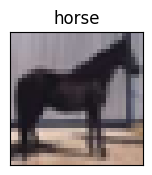

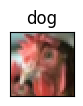

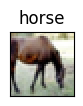

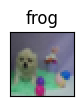

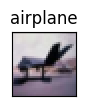

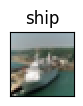

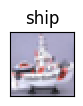

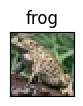

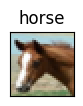

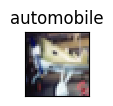

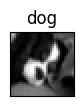

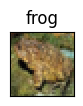

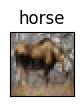

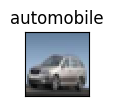

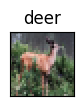

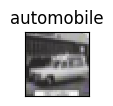

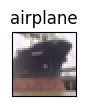

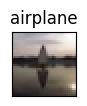

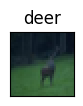

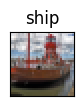

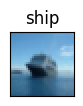

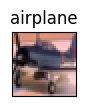

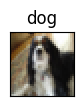

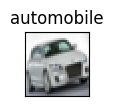

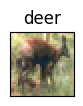

In [37]:
n_image=25 #이미지의 표시 수
rand_idx=np.random.randint(0,len(x_test),n_image) #난수

y_rand=model.predict(x_test[rand_idx]) #랜덤인 이미지를 입력으로서 예측
predicted_class=np.argmax(y_rand,axis=1)

plt.figure(figsize=(10,10))  #이미지의 표시 크기
for i in range(n_image):
  cifar_img=plt.subplot(5,5,i+1)
  plt.imshow(x_test[rand_idx[i]])
  label=cifar10_labels[predicted_class[i]] #라벨명의 취득
  plt.title(label)
  plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False)
  plt.show()
  #학습한 모델로 예측

In [38]:
from google.colab import drive
drive.mount('/content/drive/')
#모델의 저장

Mounted at /content/drive/


In [42]:
import os
from keras.models import load_model
path='/content/drive/My Drive/cnn_cifar10/'
#디렉터리를 작성한다
if not os.path.exists(path):
  os.makedirs(path)

#파일을 저장한다
model.save(path+"model_cnn_cifar10.h5")